# Análisis Exploratorio de Datos (EDA) para los Datos de the_grammy_awards

Este notebook realiza un análisis exploratorio de datos sobre la tabla `the_grammy_awards`  extraída de una base de datos MySQL. Exploraremos la distribución de los datos, identificaremos patrones clave y visualizaremos relaciones importantes en los datos.

In [ ]:
# librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector

Información sobre el dataset

In [10]:
# Importar la librería pandas
import pandas as pd

# Definir el archivo CSV
csv_file_path = '../Data/the_grammy_awards.csv'

# Cargar los datos
df = pd.read_csv(csv_file_path)

# Mostrar la información general del dataset
print("Información del dataset:")
df.info()

# Mostrar las primeras 5 filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(df.head())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB

Primeras 5 filas del dataset:
   year                              title               published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-1

buscar datos nulos

In [11]:
# Buscar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())



Cantidad de valores nulos por columna:
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


Rellenar valores nulos con valor predeterminado

In [13]:
# Rellenar valores nulos con 'desconocido' o 'imagen no disponible'
df['nominee'] = df['nominee'].fillna('desconocido')
df['artist'] = df['artist'].fillna('desconocido')
df['workers'] = df['workers'].fillna('desconocido')
df['img'] = df['img'].fillna('imagen no disponible')

# Verificar si quedan valores nulos en esas columnas
nulos_verificados = df[['nominee', 'artist', 'workers', 'img']].isnull().sum()

nulos_verificados



nominee    0
artist     0
workers    0
img        0
dtype: int64

buscar valores duplicados

In [14]:
valoresDuplicados = df.duplicated().sum()
print(valoresDuplicados)

0


buscar valores atipicos

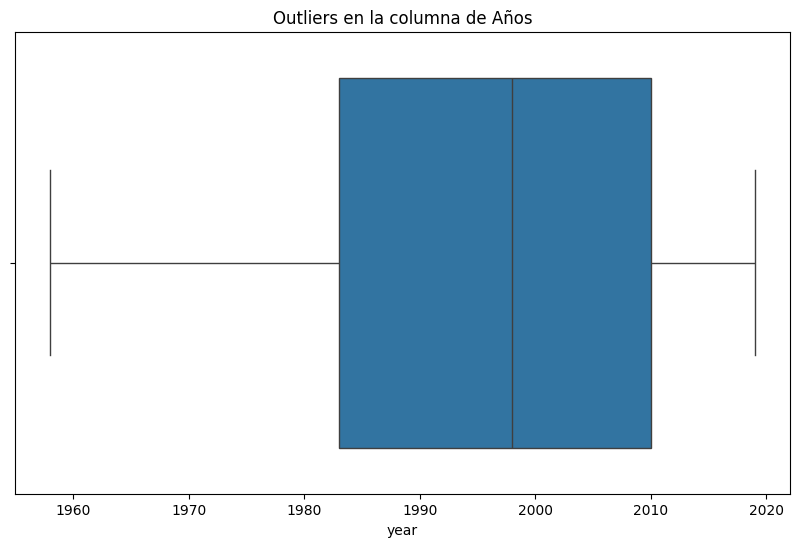

In [16]:
# Boxplot para detectar outliers en los años
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', data=df)
plt.title('Outliers en la columna de Años')
plt.show()



verificar datos incoherentes

In [17]:
# Verificar si hay valores incoherentes (por ejemplo, años fuera de rango)
incoherencias = df[(df['year'] < 1958) | (df['year'] > 2024) | (df['winner'].isnull())]

# Mostrar las incoherencias
incoherencias


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner


### graficas

Distribución de los años de los Grammy Awards

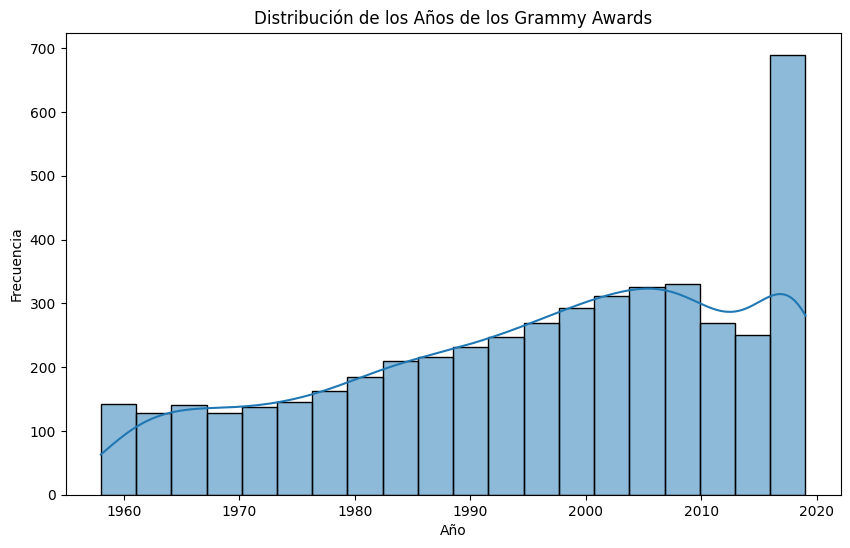

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], kde=True)
plt.title('Distribución de los Años de los Grammy Awards')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


Cantidad de ganadores por categoría

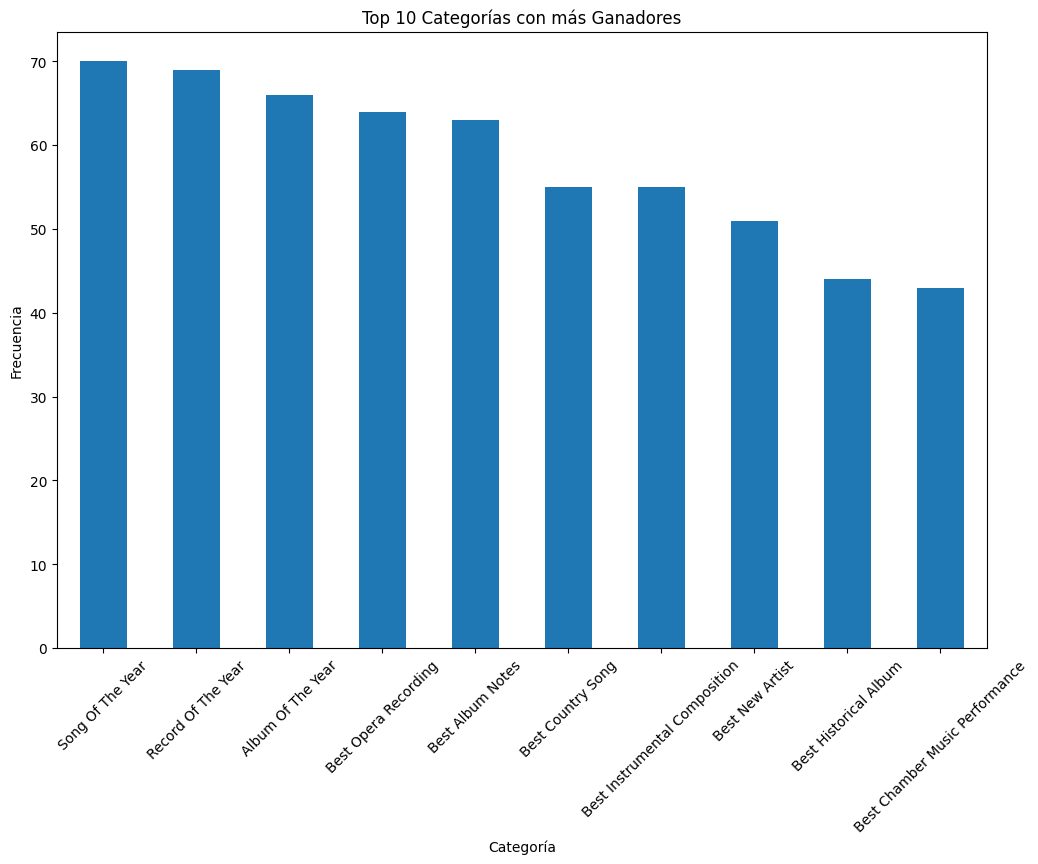

In [19]:
plt.figure(figsize=(12, 8))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categorías con más Ganadores')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Top 10 artistas con más nominaciones

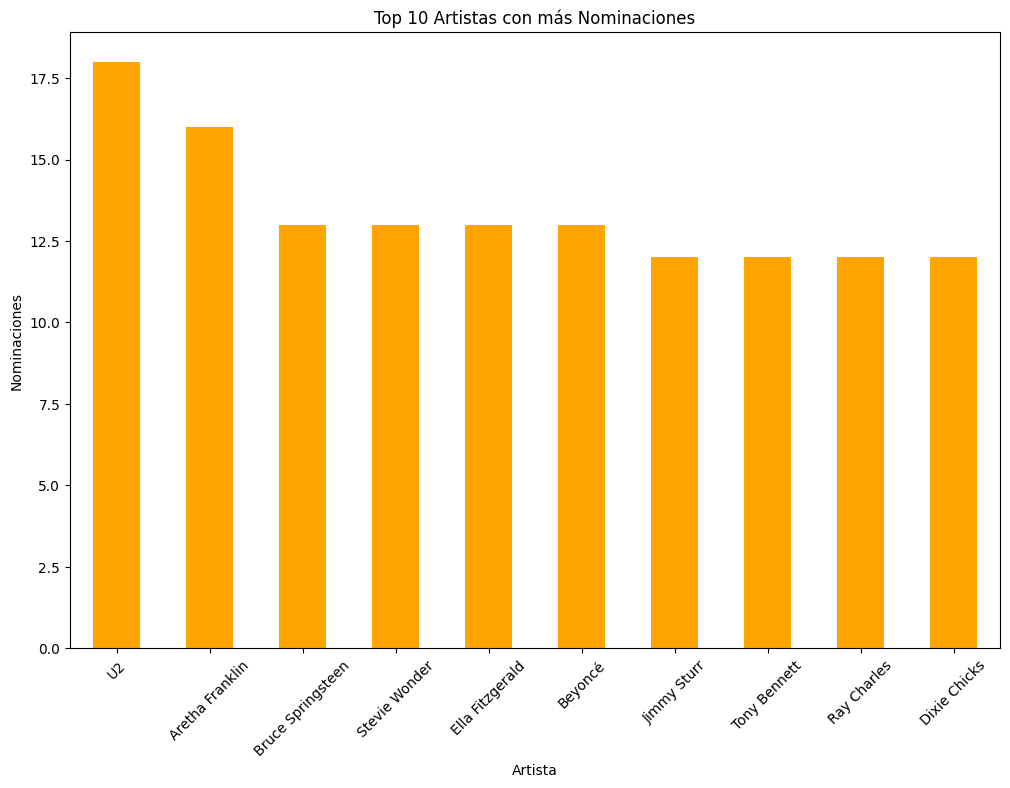

In [22]:
# Excluir el valor 'desconocido' y '(Various Artists)' antes de contar
plt.figure(figsize=(12, 8))
df_filtered = df[(df['artist'] != 'desconocido') & (df['artist'] != '(Various Artists)')]  # Filtrar 'desconocido' y 'Various Artists'
df_filtered['artist'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Artistas con más Nominaciones')
plt.xlabel('Artista')
plt.ylabel('Nominaciones')
plt.xticks(rotation=45)
plt.show()


Relación entre nominados y ganadores

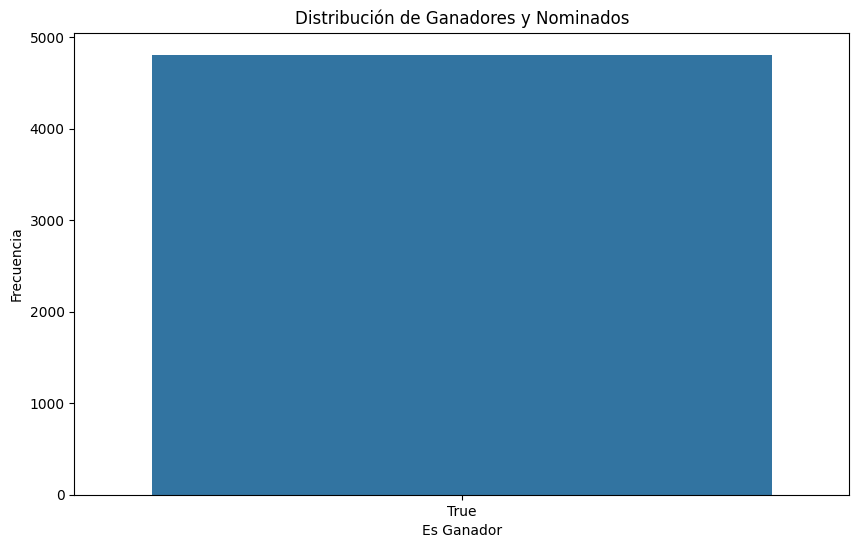

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=df)
plt.title('Distribución de Ganadores y Nominados')
plt.xlabel('Es Ganador')
plt.ylabel('Frecuencia')
plt.show()


Distribución de nominaciones por año

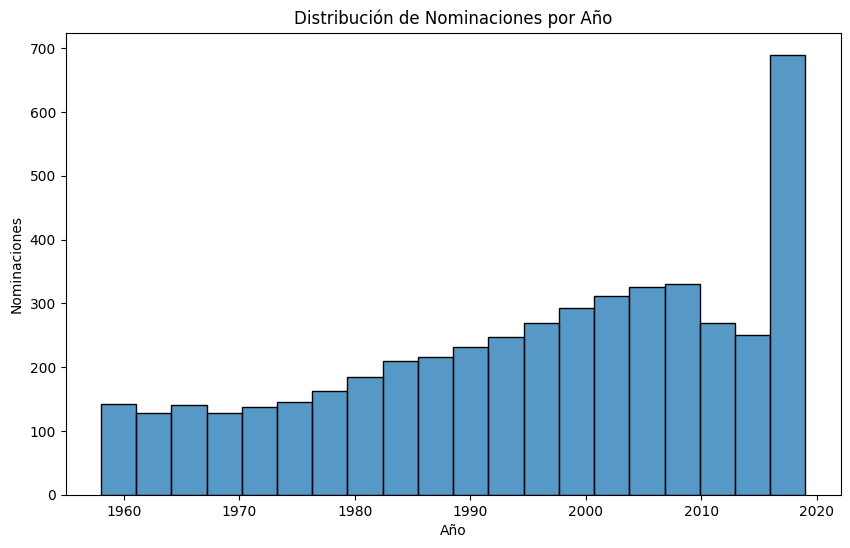

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=20)
plt.title('Distribución de Nominaciones por Año')
plt.xlabel('Año')
plt.ylabel('Nominaciones')
plt.show()


## conclusiones

El análisis comienza con la carga y limpieza de los datos, eliminando valores nulos y verificando tipos de datos. Esto asegura que el dataset esté en un estado adecuado para el análisis.

### Distribuciones de variables

Se utilizan histogramas para analizar la distribución de variables clave como los **años** en que se realizaron nominaciones. El histograma de **"year"** muestra cómo se distribuyen las nominaciones a lo largo del tiempo. Este gráfico permite ver si hay un aumento o disminución de las nominaciones en ciertos periodos, lo que podría reflejar tendencias en la cantidad de artistas nominados a lo largo de los años.

### Correlaciones entre variables

El **mapa de calor (heatmap)** de la matriz de correlación ayuda a visualizar las relaciones entre variables numéricas como la cantidad de nominaciones por artista, el año, y otros atributos relacionados. Utilizando una escala de colores, este gráfico facilita la identificación de correlaciones fuertes o débiles entre variables. Por ejemplo, podrías ver si hay alguna relación significativa entre el número de nominaciones y los años o las categorías de los premios.

### Relaciones entre pares de variables

El **gráfico de dispersión** entre **nominaciones** y **categoría** explora la relación entre estas dos variables. Cada punto en el gráfico representa una nominación en una categoría específica, lo que puede revelar si ciertas categorías tienden a tener más nominaciones a lo largo de los años. Este tipo de gráfico es útil para identificar si hay patrones visibles que muestran un aumento en las nominaciones de ciertas categorías en determinados periodos.

### Conclusión general

El EDA proporciona una visión detallada de cómo se distribuyen las nominaciones a lo largo de los años y las relaciones entre las categorías y otros factores en el dataset de los Grammy Awards. Los histogramas ayudan a visualizar la distribución de variables individuales como el año de las nominaciones, mientras que el heatmap y los gráficos de dispersión permiten identificar correlaciones y relaciones clave entre las distintas variables. Esto sienta las bases para análisis más detallados o modelado predictivo en el futuro, considerando cómo se han comportado las nominaciones a lo largo del tiempo.
